In [ ]:
Name - Dhangar sumedh dilip
Class - BE Artificial Intelligence and Data Science.
Roll No. - 15
Practical No. 2 - Regression Analysis:
A. Predict the price of the Uber ride from a given pickup point to the agreed drop-off 
location. Perform following tasks:  
1. Pre-process the dataset.  
2. Identify outliers.  
3. Check the correlation.  
4. Implement linear regression and ridge, Lasso regression models.  
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.  

In [96]:
# Import Required Librarires.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [98]:
# Step No.01 - Load the Dataset and Preprocess the dataset.

In [99]:
df = pd.read_csv(r"C:\Users\saira\Downloads\uber.csv\uber.csv")

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [101]:
df.shape

(200000, 9)

In [102]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [103]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [104]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [105]:
df = df.dropna()

In [106]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [107]:
df.drop(columns=['Unnamed: 0', 'key'], errors='ignore', inplace=True)


In [108]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [109]:
df = df.drop(columns=['pickup_datetime'])

In [110]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [111]:
# Step No.02 - Identify Outliers.

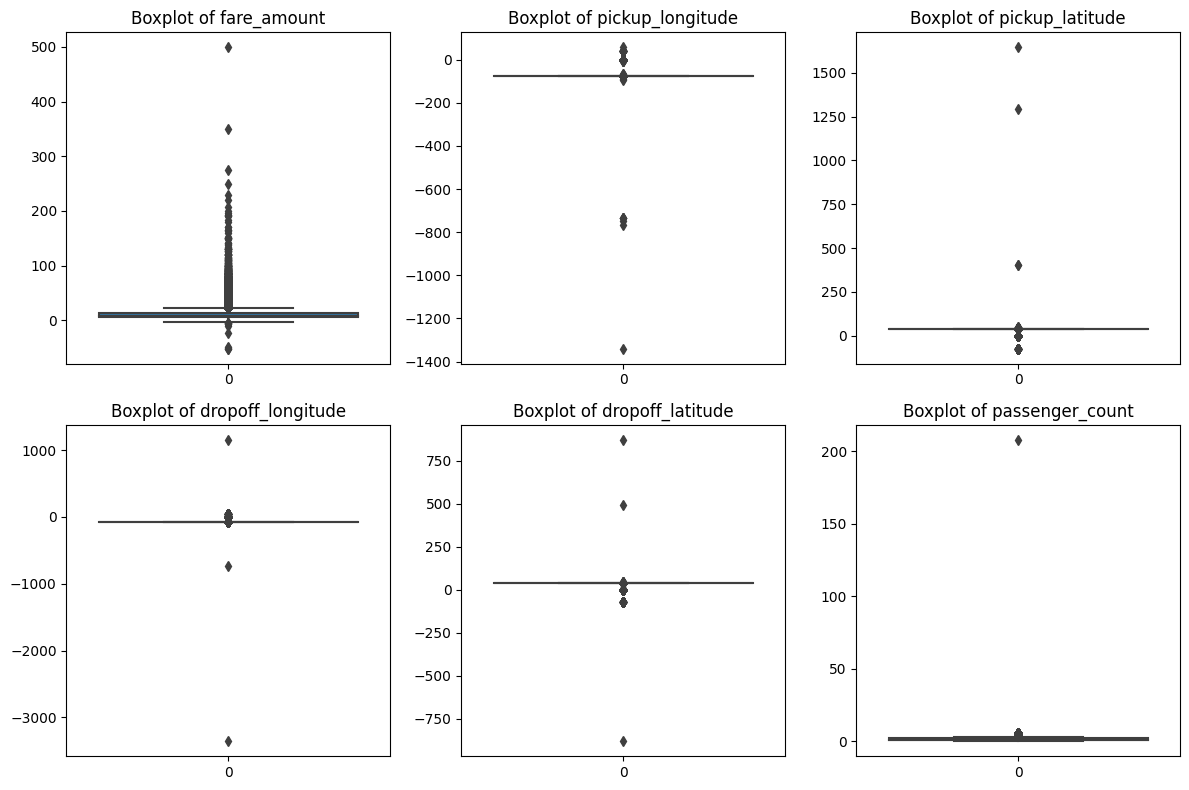

In [112]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [113]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition: values outside 1.5 * IQR range
outlier_condition = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Identify outliers
outliers = outlier_condition.any(axis=1)

# Filter out the outliers
df_no_outliers = df[~outliers]

# Print the number of rows before and after outlier removal
print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after removing outliers: {df_no_outliers.shape[0]}")


Original number of rows: 199999
Number of rows after removing outliers: 151022


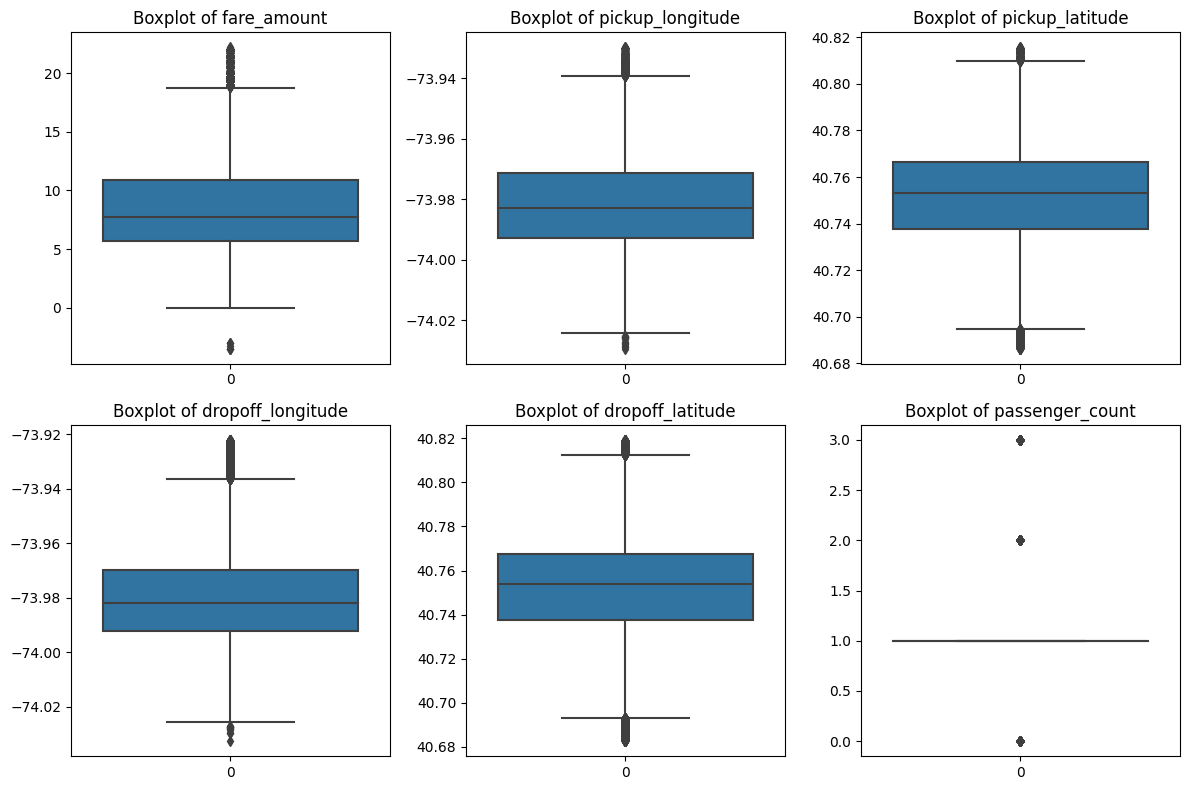

In [114]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_no_outliers.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df_no_outliers[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [115]:
# Step No.03 - Check the correlation.

In [116]:
# Compute the correlation matrix
correlation_matrix = df.corr()



In [117]:
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


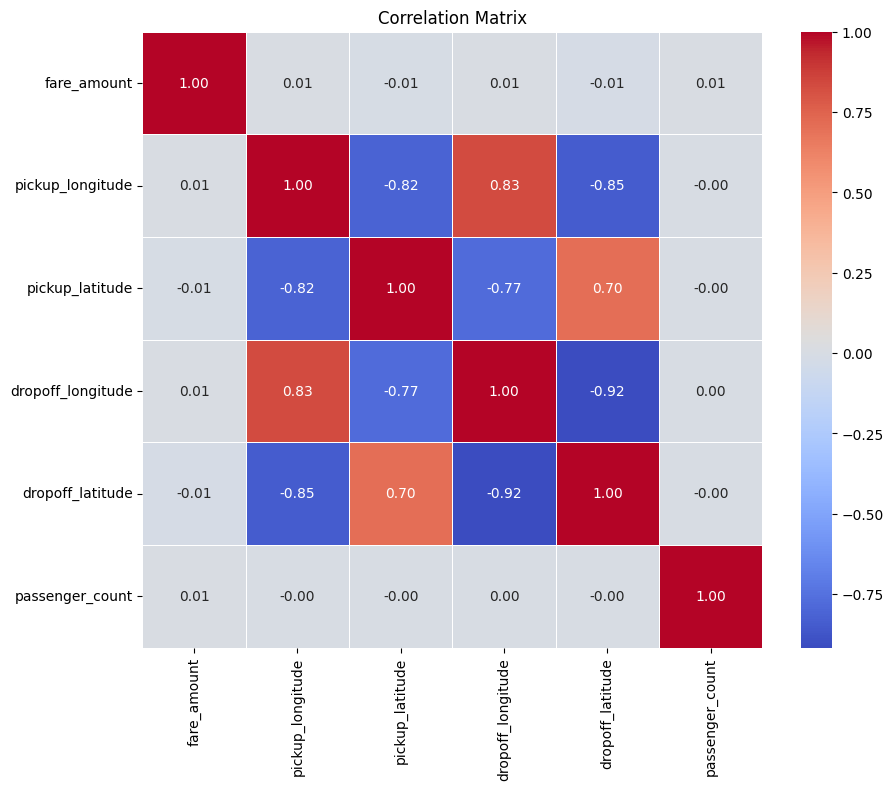

In [118]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [119]:
# Step No.04 - Implement linear regression and ridge, Lasso regression models.

In [120]:
# Define features (X) and target (y)
df_x = df[['pickup_longitude', 'pickup_latitude',
           'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
df_y = df['fare_amount']


In [121]:
# Split data into training and test sets
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)




In [122]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
df_x_train_scaled = scaler.fit_transform(df_x_train)
df_x_test_scaled = scaler.transform(df_x_test)

# Confirm the transformation
print("Scaled training features sample:", df_x_train_scaled[:5])
print("Scaled test features sample:", df_x_test_scaled[:5])

Scaled training features sample: [[-0.12806476  0.10333281 -0.10748269  0.11866164 -0.48742328]
 [-0.12954074  0.10091712 -0.10782511  0.11677964 -0.48742328]
 [-0.12814473  0.10475455 -0.10695049  0.1238506   0.93623406]
 [-0.12488911  0.10491248 -0.10539756  0.12284946  0.22440539]
 [-0.12645825  0.10127165 -0.09220501  0.10396888  2.3598914 ]]
Scaled test features sample: [[-0.12922127  0.10159049 -0.10769287  0.11689934 -0.48742328]
 [-0.12750134  0.10520881 -0.10792169  0.12251714 -0.48742328]
 [-0.12784325  0.09855925 -0.10792851  0.11996002  2.3598914 ]
 [-0.12710993  0.10316779 -0.10811646  0.11791093 -0.48742328]
 [-0.1284243   0.10125996 -0.1076746   0.11791035 -0.48742328]]


In [123]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(df_x_train_scaled, df_y_train)


LinearRegression()

In [124]:
# Make predictions
df_y_pred = model.predict(df_x_test_scaled)
df_y_pred

array([11.29237916, 11.29171388, 11.5718662 , ..., 11.29183291,
       11.43252639, 11.29190248])

In [125]:
# Initialize the Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(df_x_train_scaled, df_y_train)

Lasso(alpha=0.1)

In [126]:
# Make predictions
df_y_pred_lasso = lasso_model.predict(df_x_test_scaled)
df_y_pred_lasso


array([11.35274608, 11.35274608, 11.35274608, ..., 11.35274608,
       11.35274608, 11.35274608])

In [127]:
# Initialize the Ridge model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(df_x_train_scaled, df_y_train)

Ridge(alpha=0.1)

In [128]:
# Make predictions
df_y_pred_ridge = ridge_model.predict(df_x_test_scaled)
df_y_pred_ridge

array([11.2923792 , 11.29171393, 11.57186607, ..., 11.29183296,
       11.43252634, 11.29190252])

In [129]:
# Step No.05 - Evaluate the models and compare their respective scores like R2, RMSE.

In [130]:
# Function to evaluate model performance
def evaluate_model(predictions, true_values):
    r2 = r2_score(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    return r2, rmse

# Evaluate each model
linear_r2, linear_rmse = evaluate_model(df_y_pred, df_y_test)
lasso_r2, lasso_rmse = evaluate_model(df_y_pred_lasso, df_y_test)
ridge_r2, ridge_rmse = evaluate_model(df_y_pred_ridge, df_y_test)

# Create a DataFrame to display results in matrix format
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'R^2 Score': [linear_r2, lasso_r2, ridge_r2],
    'RMSE': [linear_rmse, lasso_rmse, ridge_rmse]
})

# Display the results
print(results)

               Model  R^2 Score       RMSE
0  Linear Regression   0.000342  10.197471
1   Lasso Regression  -0.000012  10.199275
2   Ridge Regression   0.000342  10.197471
